# Plot Scores for Columns of MSA

## Import and Clean Data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings

# remove to see copy warning in second box
warnings.filterwarnings("ignore", module="pandas")

in_fh = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR42792\P04949_ortholog_msa_scores3.data"

df = pd.read_csv(in_fh)

In [3]:
# remove columns with no information
df_clean = df[df.Identity != 'X']

print(len(df_clean), "columns used in analysis.\n")

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes
#df_clean.head()

260 columns used in analysis.



Identity                          object
Percent Identity                 float64
Avg Blosum62 Score               float64
Avg Frequency Score              float64
Avg Expected Frequency Score     float64
Avg Frequency Score Ratio        float64
Log Avg Frequency Score Ratio    float64
Avg Frequency Ratio              float64
Avg Log Odds Frequency           float64
Fraction Aligned                 float64
Fraction Disordered              float64
Avg Disorder Strength            float64
dtype: object

## Distributions of Each Score

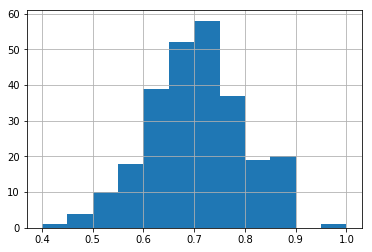

In [4]:
df_clean['Avg Frequency Score'].hist(bins = np.arange(0.4, 1.01, 0.05));

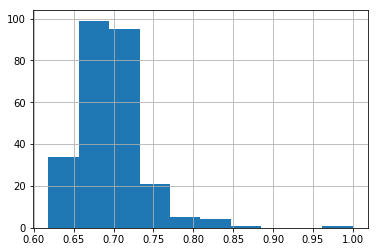

In [5]:
df_clean['Avg Expected Frequency Score'].hist();

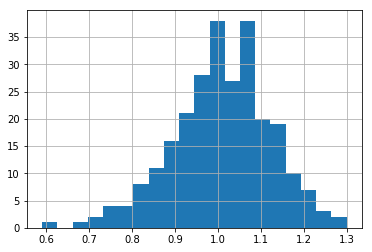

In [6]:
df_clean['Avg Frequency Score Ratio'].hist(bins = 20);

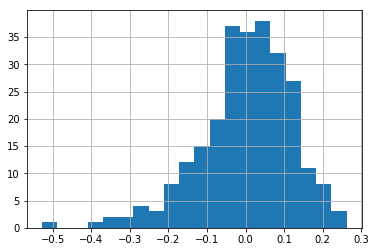

In [7]:
df_clean['Log Avg Frequency Score Ratio'].hist(bins = 20);

No diff from non-log score

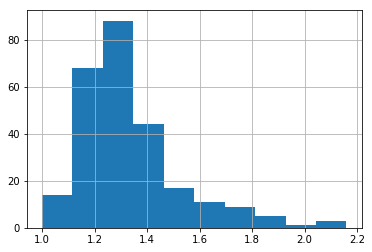

In [8]:
df_clean['Avg Frequency Ratio'].hist();

no columns less than 1

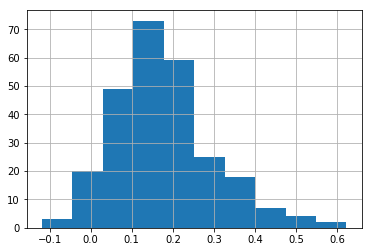

In [9]:
df_clean['Avg Log Odds Frequency'].hist();

a couple coulmns have slightly less frequent codons than expected on average

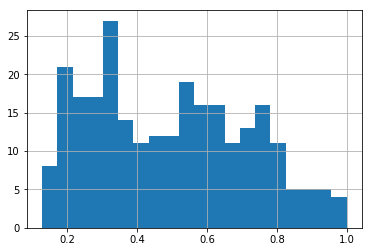

In [10]:
df_clean['Percent Identity'].hist(bins = 20);

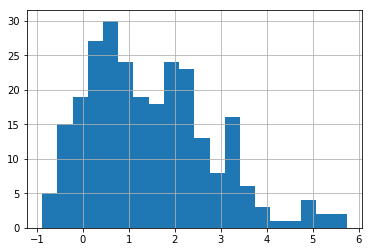

In [11]:
df_clean['Avg Blosum62 Score'].hist(bins = 20);

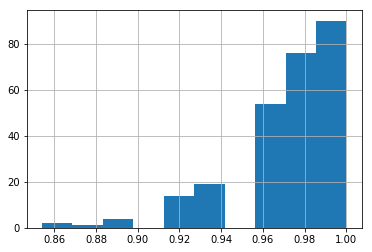

In [12]:
df_clean['Fraction Aligned'].hist();

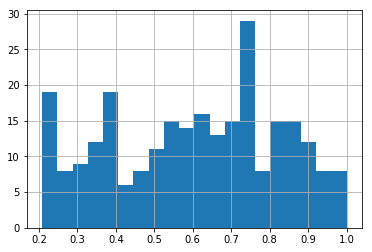

In [13]:
df_clean['Fraction Disordered'].hist(bins = 20);

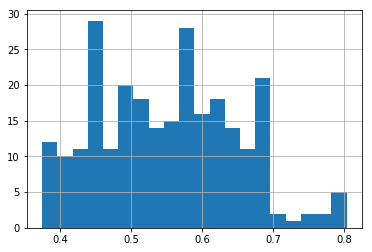

In [14]:
df_clean['Avg Disorder Strength'].hist(bins = 20);

Sanity Checks

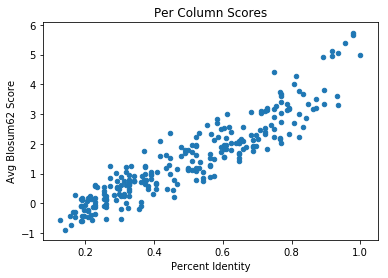

In [15]:
df_clean.plot.scatter('Percent Identity', 'Avg Blosum62 Score', title='Per Column Scores');

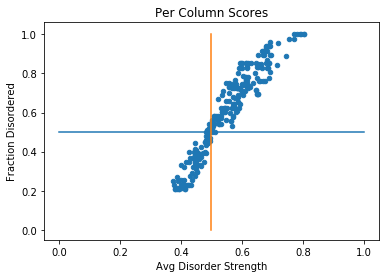

In [16]:
df_clean.plot.scatter('Avg Disorder Strength', 'Fraction Disordered', title='Per Column Scores')
plt.plot([0.5,0.5])
plt.plot([0.5,0.5],[0,1]);

very few columns (if any) scored differently by soft and hard scores splitting at 50% (so only making 50% split graphs for 1 score)

## Plot Column Scores

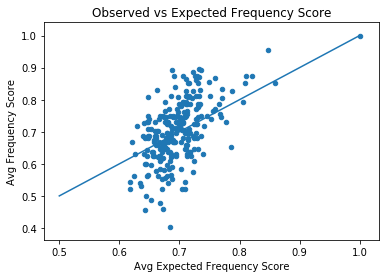

In [18]:
df_clean.plot.scatter("Avg Expected Frequency Score", "Avg Frequency Score", title="Observed vs Expected Frequency Score")
plt.plot([0.5,1], [0.5,1]);

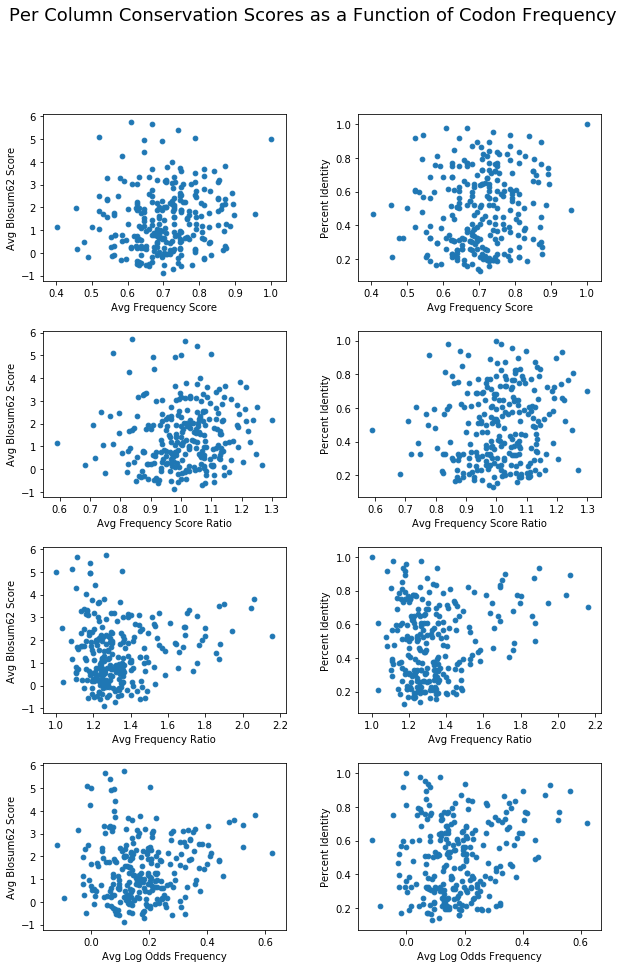

In [19]:
# each array is a row; figsize=(width,height)
fig, ([ax1,ax2], [ax3,ax4], [ax5,ax6], [ax7,ax8]) = plt.subplots(4, 2, sharex='row', figsize=(10,15), 
                                                                 subplot_kw={'xlabel':"Avg Frequency Score"})

fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)


ax1.scatter(df_clean['Avg Frequency Score'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set_ylabel('Avg Blosum62 Score')

ax2.scatter(df_clean['Avg Frequency Score'], df_clean['Percent Identity'], s=22)
ax2.set_ylabel('Percent Identity')

ax3.scatter(df_clean['Avg Frequency Score Ratio'], df_clean['Avg Blosum62 Score'], s=22)
ax3.set(xlabel='Avg Frequency Score Ratio', ylabel='Avg Blosum62 Score')

ax4.scatter(df_clean['Avg Frequency Score Ratio'], df_clean['Percent Identity'], s=22)
ax4.set(xlabel='Avg Frequency Score Ratio', ylabel='Percent Identity')

ax5.scatter(df_clean['Avg Frequency Ratio'], df_clean['Avg Blosum62 Score'], s=22)
ax5.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score')

ax6.scatter(df_clean['Avg Frequency Ratio'], df_clean['Percent Identity'], s=22)
ax6.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity')

#ax5.scatter(df_clean['Log Avg Frequency Ratio'], df_clean['Avg Blosum62 Score'], s=22)
#ax5.set(xlabel='Log Avg Frequency Ratio', ylabel='Avg Blosum62 Score')

#ax6.scatter(df_clean['Log Avg Frequency Ratio'], df_clean['Percent Identity'], s=22)
#ax6.set(xlabel='Log Avg Frequency Ratio', ylabel='Percent Identity')

ax7.scatter(df_clean['Avg Log Odds Frequency'], df_clean['Avg Blosum62 Score'], s=22)
ax7.set(xlabel='Avg Log Odds Frequency', ylabel='Avg Blosum62 Score')

ax8.scatter(df_clean['Avg Log Odds Frequency'], df_clean['Percent Identity'], s=22)
ax8.set(xlabel='Avg Log Odds Frequency', ylabel='Percent Identity')

fig.subplots_adjust(hspace=0.3, wspace=0.3);


What differences are observed between the four different frequency scores used?

## Fraction Disorder Split at 50% for same scores above

In [20]:
# initialize dataframes split at 50% disorder
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

Need to set scales for each score to the same; ignore for now... use individuals below

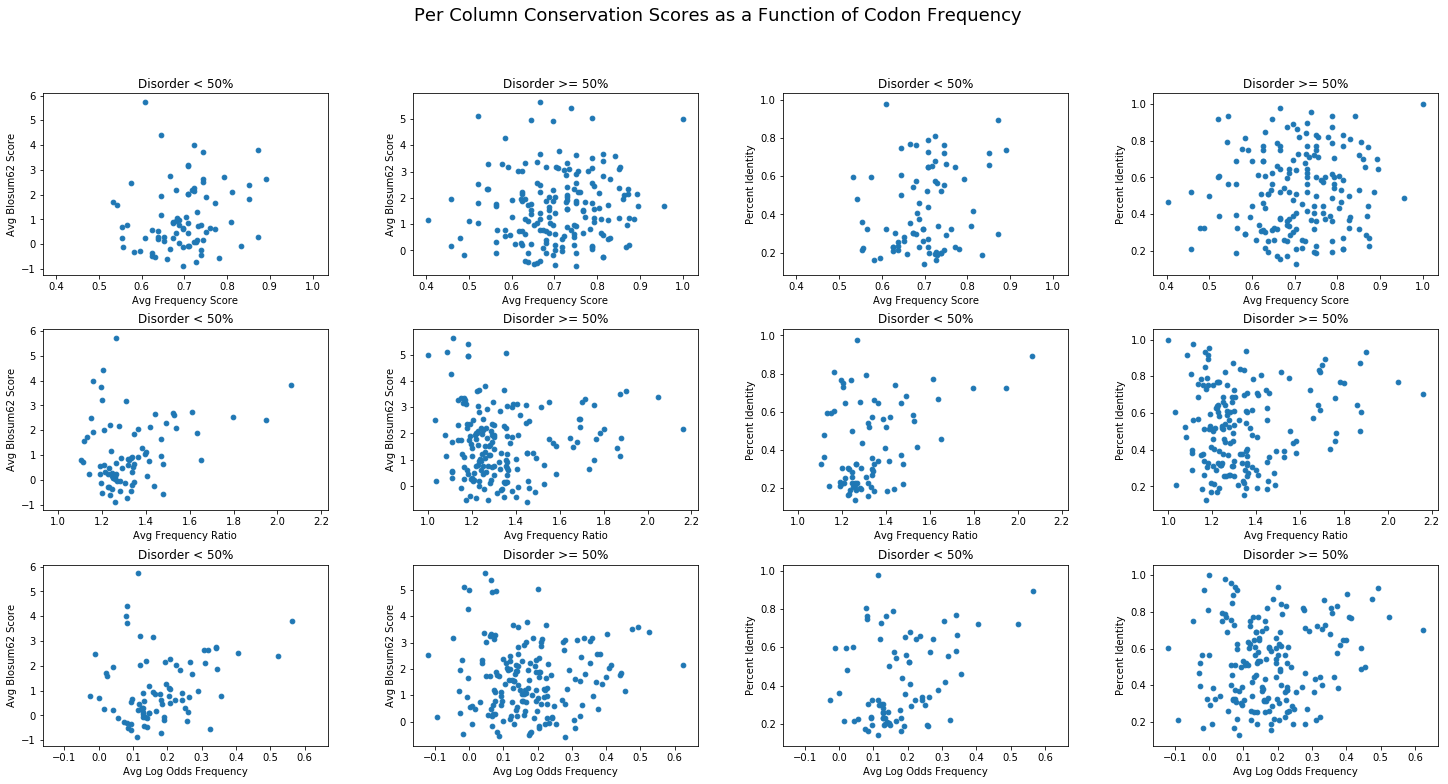

In [21]:
# make 2 subplots share yaxis? get all blossum share and all pecent id share?
fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8], [ax9,ax10,ax11,ax12]) = plt.subplots(3, 4, sharex='row', figsize=(25,12), 
                                                           subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

# freq score
ax1.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax3.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# freq ratio
ax5.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax5.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax6.set(xlabel='Avg Frequency Ratio', ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax7.scatter(df_clean_dis1['Avg Frequency Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax7.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis2['Avg Frequency Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax8.set(xlabel='Avg Frequency Ratio', ylabel='Percent Identity', title='Disorder >= 50%')

# not doing Log Avg Freq ratio here cause no diff seen (look below)

# avg log odds freq
ax9.scatter(df_clean_dis1['Avg Log Odds Frequency'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax9.set(xlabel="Avg Log Odds Frequency", ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax10.scatter(df_clean_dis2['Avg Log Odds Frequency'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax10.set(xlabel="Avg Log Odds Frequency", ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


ax11.scatter(df_clean_dis1['Avg Log Odds Frequency'], df_clean_dis1['Percent Identity'], s=22)
ax11.set(xlabel="Avg Log Odds Frequency", ylabel='Percent Identity', title='Disorder < 50%')

ax12.scatter(df_clean_dis2['Avg Log Odds Frequency'], df_clean_dis2['Percent Identity'], s=22)
ax12.set(xlabel="Avg Log Odds Frequency", ylabel='Percent Identity', title='Disorder >= 50%')

fig.subplots_adjust(hspace=0.3, wspace=0.3);

Comparison between score ratio and log score ratio; no diff (del later)

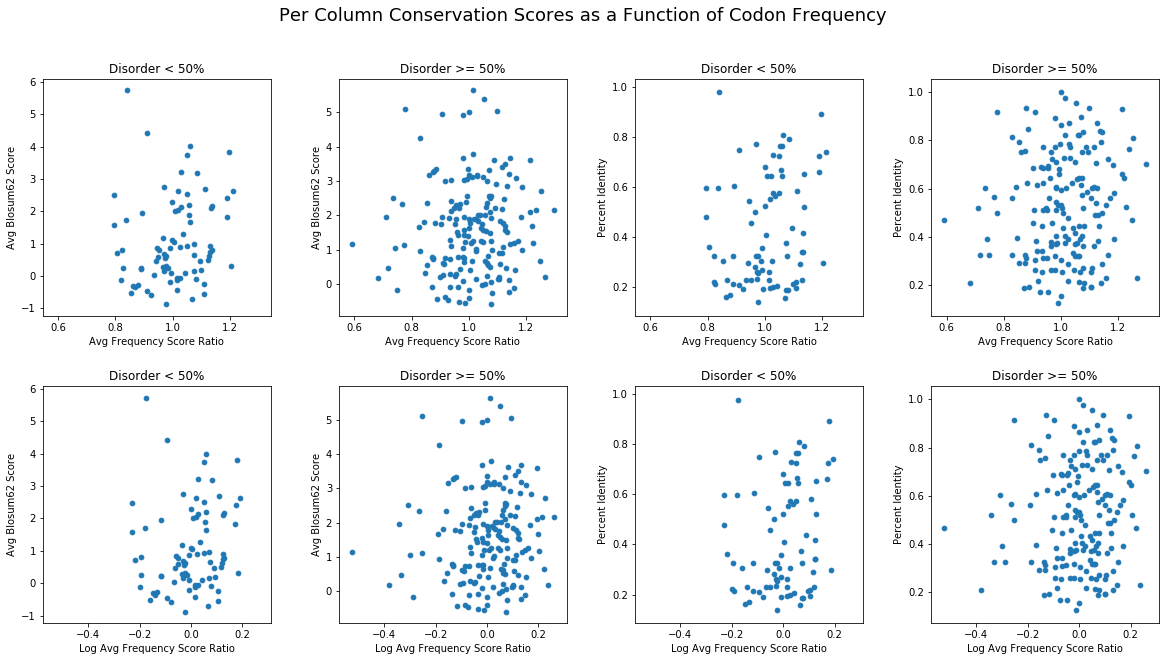

In [22]:
fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8]) = plt.subplots(2, 4, sharex='row', figsize=(20,10), 
                                                           subplot_kw={'xlabel':"Avg Frequency Score Ratio"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

# freq ratio
ax1.scatter(df_clean_dis1['Avg Frequency Score Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Score Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


ax3.scatter(df_clean_dis1['Avg Frequency Score Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# log freq ratio
ax5.scatter(df_clean_dis1['Log Avg Frequency Score Ratio'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax5.set(xlabel='Log Avg Frequency Score Ratio', ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis2['Log Avg Frequency Score Ratio'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax6.set(xlabel='Log Avg Frequency Score Ratio', ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


ax7.scatter(df_clean_dis1['Log Avg Frequency Score Ratio'], df_clean_dis1['Percent Identity'], s=22)
ax7.set(xlabel='Log Avg Frequency Score Ratio', ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis2['Log Avg Frequency Score Ratio'], df_clean_dis2['Percent Identity'], s=22)
ax8.set(xlabel='Log Avg Frequency Score Ratio', ylabel='Percent Identity', title='Disorder >= 50%')

fig.subplots_adjust(hspace=0.3, wspace=0.3)



Plotting each individual frequency score against consv. with split

In [23]:
def plot_consv_scatters(column_name):

    fig, ([ax1,ax2], [ax3,ax4]) = plt.subplots(2, 2, sharex=True, sharey ='row', figsize=(15,10), 
                                               subplot_kw={'xlabel':column_name})
    fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency", fontsize=18)

    # freq score
    ax1.scatter(df_clean_dis1[column_name], df_clean_dis1['Avg Blosum62 Score'], s=22)
    ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

    ax2.scatter(df_clean_dis2[column_name], df_clean_dis2['Avg Blosum62 Score'], s=22)
    ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')


    ax3.scatter(df_clean_dis1[column_name], df_clean_dis1['Percent Identity'], s=22)
    ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

    ax4.scatter(df_clean_dis2[column_name], df_clean_dis2['Percent Identity'], s=22)
    ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


    # turn on axis tick labels even though axis is shared
    for ax in fig.axes:
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)

    fig.subplots_adjust(hspace=0.3, wspace=0.3);

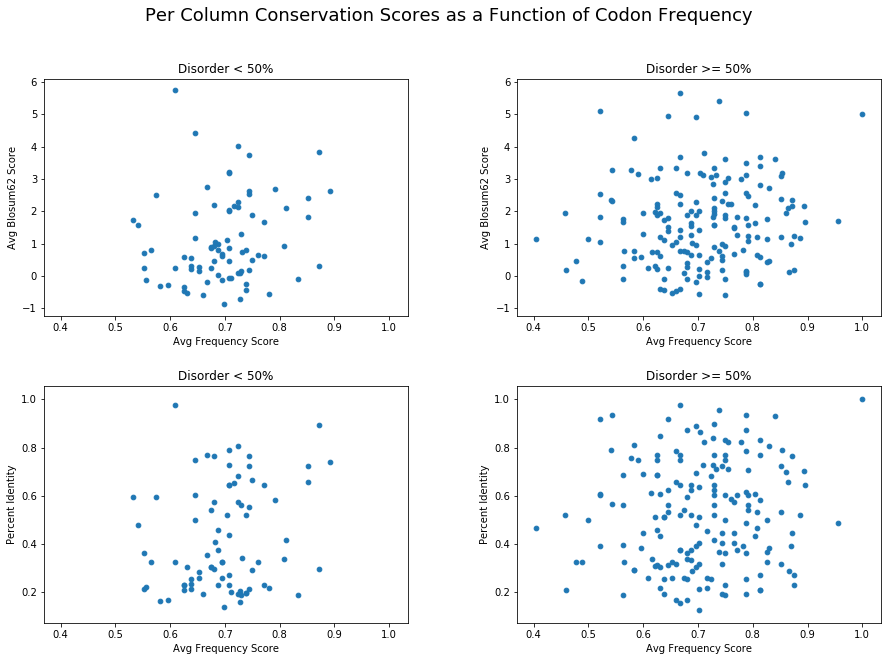

In [30]:
plot_consv_scatters("Avg Frequency Score")

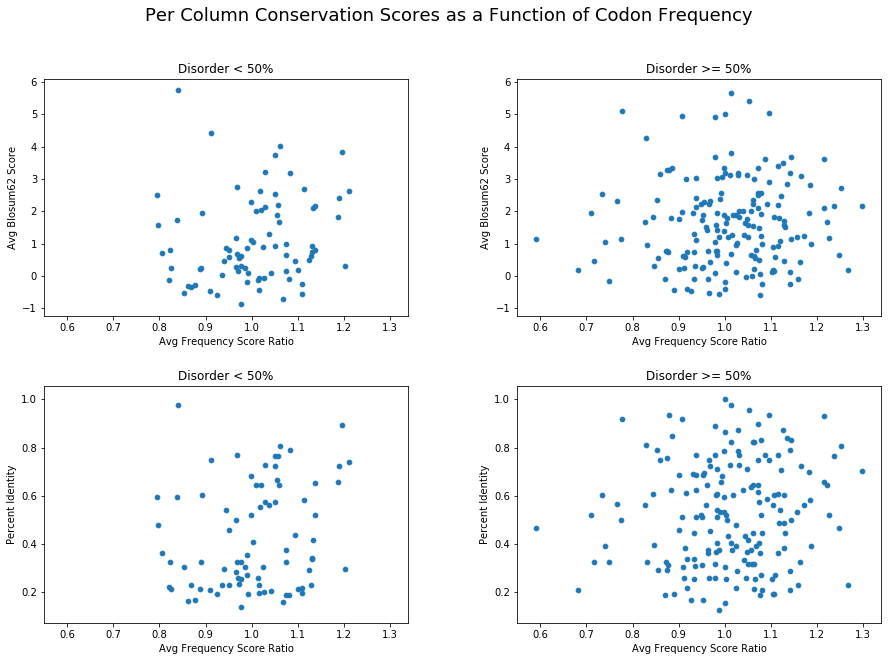

In [26]:
plot_consv_scatters("Avg Frequency Score Ratio")

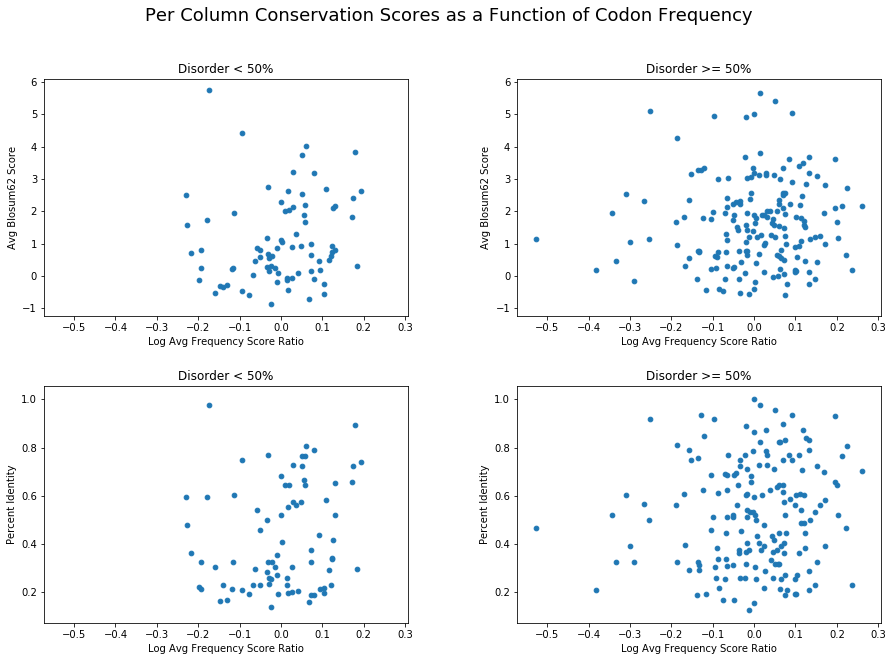

In [27]:
plot_consv_scatters('Log Avg Frequency Score Ratio')

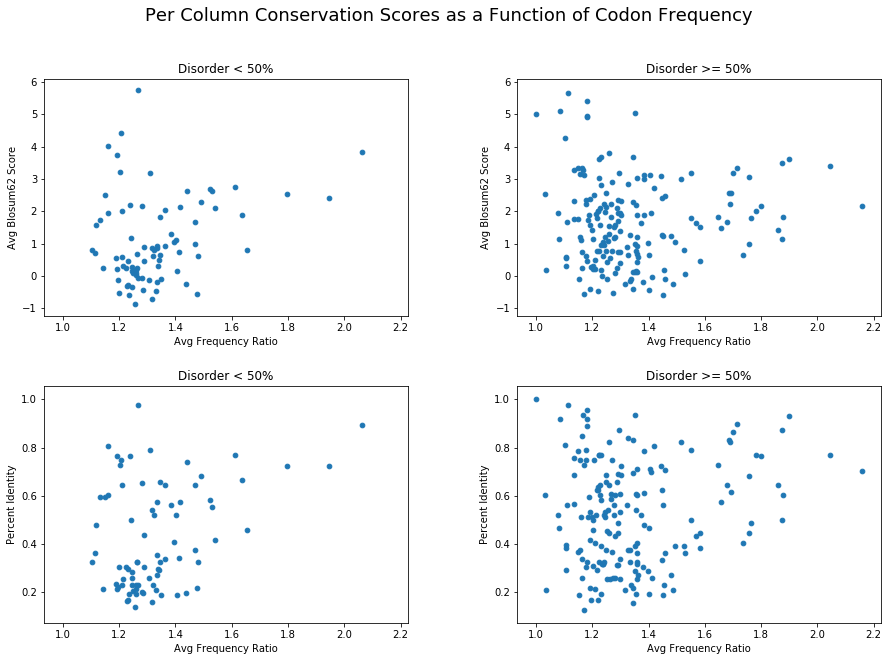

In [28]:
plot_consv_scatters('Avg Frequency Ratio')

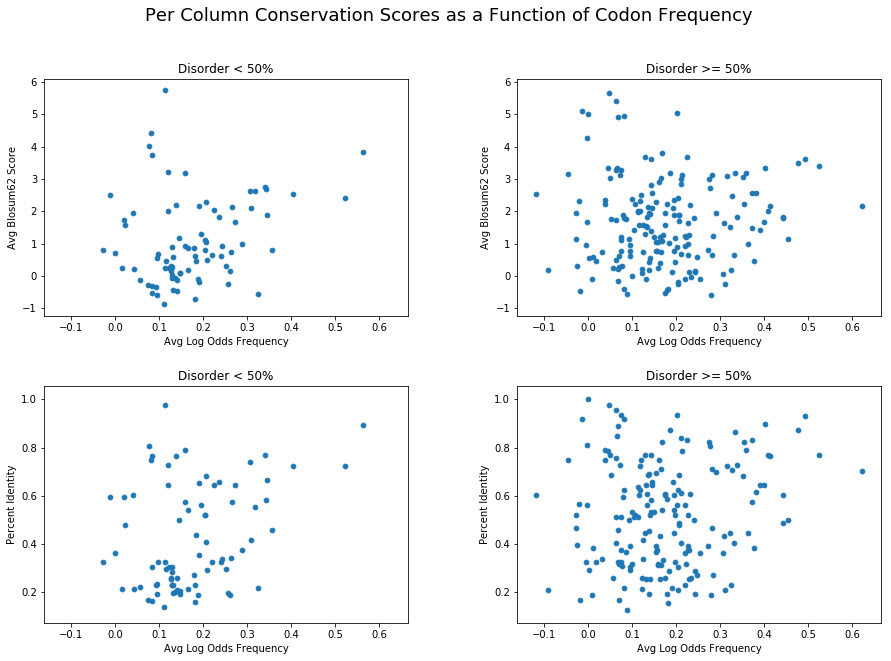

In [29]:
plot_consv_scatters('Avg Log Odds Frequency')

## Split at 50% Disorder Strength hardly changes anything as expected since vsl2 splits at 50% strength for labeling disorder or order

Reinforces graph from earlier

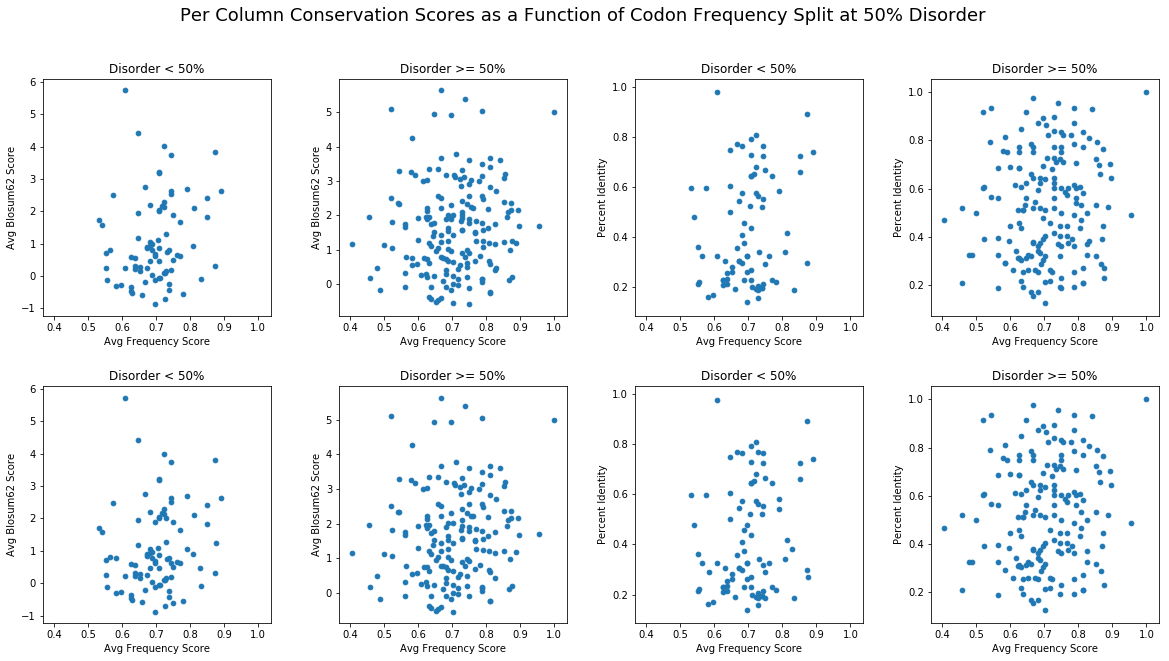

In [31]:
df_clean_dis3 = df_clean[df_clean['Avg Disorder Strength'] < 0.5]
df_clean_dis4 = df_clean[df_clean['Avg Disorder Strength'] >= 0.5]

fig, ([ax1,ax2,ax3,ax4], [ax5,ax6,ax7,ax8]) = plt.subplots(2, 4, sharex='row', figsize=(20,10), 
                                                           subplot_kw={'xlabel':"Avg Frequency Score"})
fig.suptitle("Per Column Conservation Scores as a Function of Codon Frequency Split at 50% Disorder", fontsize=18)

# Fraction Disorder
ax1.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax2.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Avg Blosum62 Score'], s=22)
ax2.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax3.scatter(df_clean_dis1['Avg Frequency Score'], df_clean_dis1['Percent Identity'], s=22)
ax3.set(ylabel='Percent Identity', title='Disorder < 50%')

ax4.scatter(df_clean_dis2['Avg Frequency Score'], df_clean_dis2['Percent Identity'], s=22)
ax4.set(ylabel='Percent Identity', title='Disorder >= 50%')


# Disorder Strength
ax5.scatter(df_clean_dis3['Avg Frequency Score'], df_clean_dis3['Avg Blosum62 Score'], s=22)
ax5.set(ylabel='Avg Blosum62 Score', title='Disorder < 50%')

ax6.scatter(df_clean_dis4['Avg Frequency Score'], df_clean_dis4['Avg Blosum62 Score'], s=22)
ax6.set(ylabel='Avg Blosum62 Score', title='Disorder >= 50%')

ax7.scatter(df_clean_dis3['Avg Frequency Score'], df_clean_dis3['Percent Identity'], s=22)
ax7.set(ylabel='Percent Identity', title='Disorder < 50%')

ax8.scatter(df_clean_dis4['Avg Frequency Score'], df_clean_dis4['Percent Identity'], s=22)
ax8.set(ylabel='Percent Identity', title='Disorder >= 50%')


fig.subplots_adjust(hspace=0.3, wspace=0.3);

# Filter by Fraction Aligned

In [32]:
print(min(df_clean['Fraction Aligned']))

0.8541666666666666


In [33]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Avg Expected Frequency Score,Avg Frequency Score Ratio,Log Avg Frequency Score Ratio,Avg Frequency Ratio,Avg Log Odds Frequency,Fraction Aligned,Fraction Disordered,Avg Disorder Strength


In [34]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Avg Expected Frequency Score,Avg Frequency Score Ratio,Log Avg Frequency Score Ratio,Avg Frequency Ratio,Avg Log Odds Frequency,Fraction Aligned,Fraction Disordered,Avg Disorder Strength


In [35]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Avg Expected Frequency Score,Avg Frequency Score Ratio,Log Avg Frequency Score Ratio,Avg Frequency Ratio,Avg Log Odds Frequency,Fraction Aligned,Fraction Disordered,Avg Disorder Strength


In [36]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Avg Expected Frequency Score,Avg Frequency Score Ratio,Log Avg Frequency Score Ratio,Avg Frequency Ratio,Avg Log Odds Frequency,Fraction Aligned,Fraction Disordered,Avg Disorder Strength
0,M,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.916667,1.000000,0.802915
63,R,0.325581,-0.170543,0.488372,0.652717,0.748214,-0.290067,1.333293,0.068340,0.895833,1.000000,0.795098
64,I,0.613636,3.010571,0.613636,0.669262,0.916885,-0.086773,1.383074,0.210202,0.916667,1.000000,0.789348
65,N,0.755556,3.269697,0.577778,0.660874,0.874263,-0.134375,1.133738,0.062433,0.937500,0.977778,0.771662
66,T,0.688889,1.932323,0.600000,0.644294,0.931252,-0.071225,1.290311,0.138031,0.937500,0.888889,0.743916
67,N,0.977778,5.644444,0.666667,0.657854,1.013396,0.013307,1.112597,0.047526,0.937500,0.844444,0.716216
68,V,0.288889,1.023232,0.688889,0.671591,1.025756,0.025430,1.399329,0.183449,0.937500,0.777778,0.689128
69,S,0.326087,0.472464,0.478261,0.667276,0.716736,-0.333047,1.180193,0.017071,0.958333,0.760870,0.674470
70,A,0.521739,1.957488,0.456522,0.643155,0.709816,-0.342750,1.077939,-0.026685,0.958333,0.760870,0.658984
71,L,0.434783,1.631884,0.804348,0.771012,1.043236,0.042328,1.569729,0.308025,0.958333,0.760870,0.655220


## Distribution of Each Score Split at 50% Fraction Disorder

Don't use this below block atm

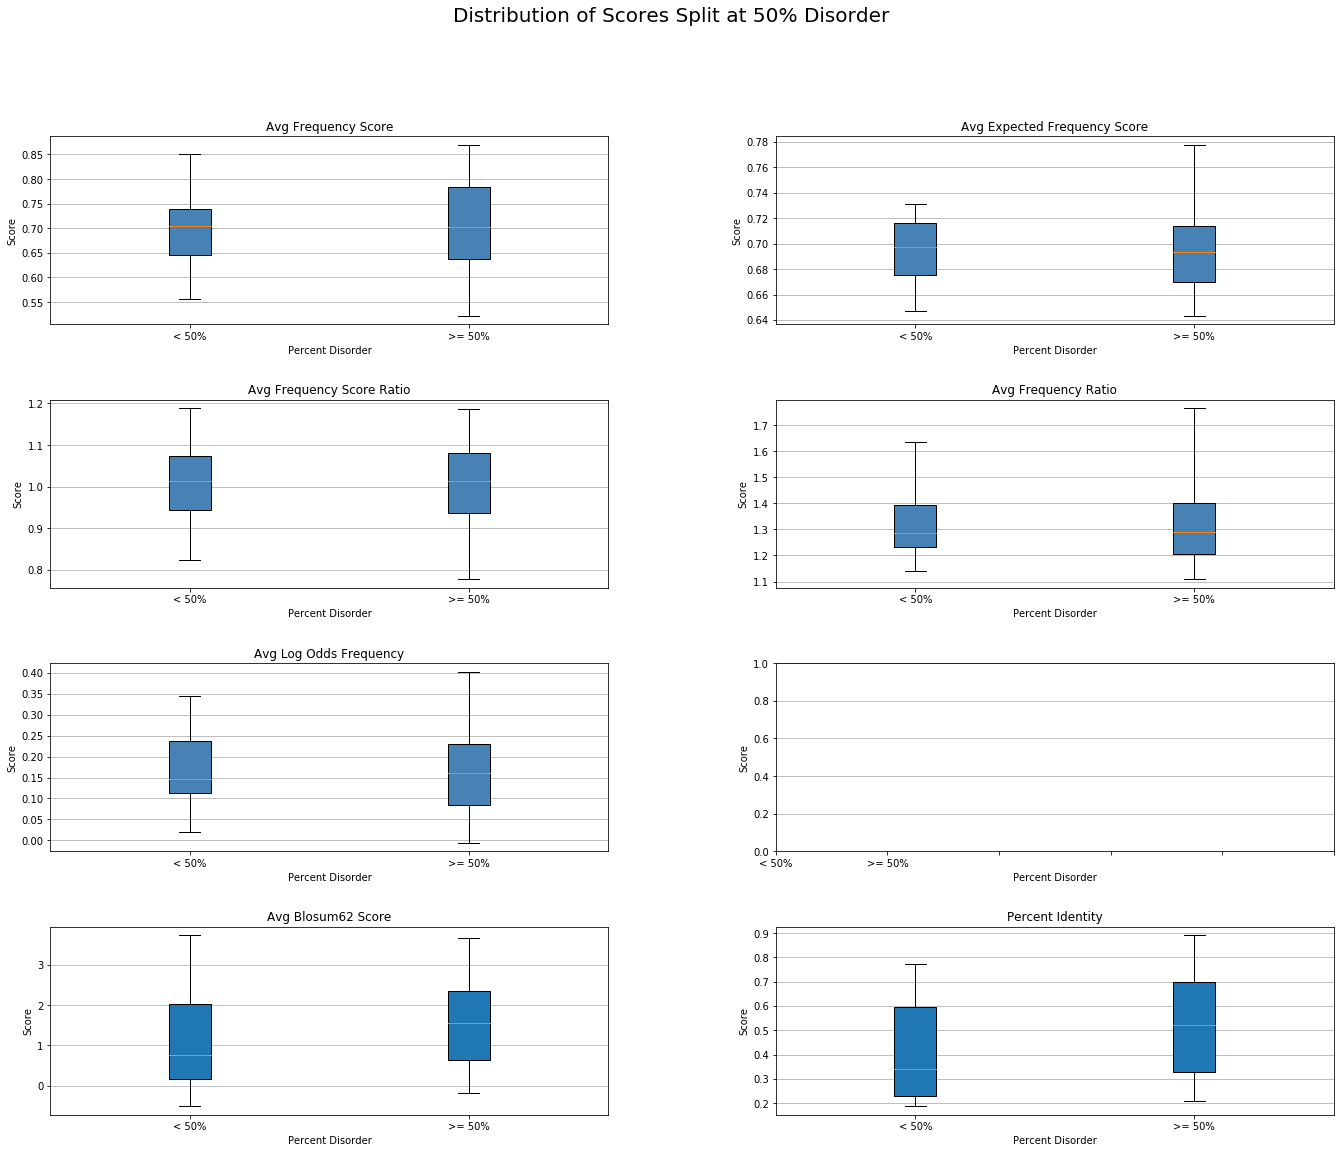

In [37]:
fig, ([ax1,ax2], [ax3,ax4], [ax5,ax6], [ax7,ax8]) = plt.subplots(4, 2, figsize=(23,18), subplot_kw={'xlabel':"Percent Disorder", 'ylabel': 'Score'})
fig.suptitle("Distribution of Scores Split at 50% Disorder", fontsize=20)

color = "steelblue"
ax1.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax1.set(title="Avg Frequency Score")

ax2.boxplot([df_clean_dis1["Avg Expected Frequency Score"], df_clean_dis2["Avg Expected Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax2.set(title="Avg Expected Frequency Score")


ax3.boxplot([df_clean_dis1["Avg Frequency Score Ratio"], df_clean_dis2["Avg Frequency Score Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax3.set(title="Avg Frequency Score Ratio")
            
ax4.boxplot([df_clean_dis1["Avg Frequency Ratio"], df_clean_dis2["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax4.set(title="Avg Frequency Ratio")
            
            
            
ax5.boxplot([df_clean_dis1["Avg Log Odds Frequency"], df_clean_dis2["Avg Log Odds Frequency"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))
ax5.set(title="Avg Log Odds Frequency")
            
            

ax7.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)
ax7.set(title="Avg Blosum62 Score")

ax8.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)
ax8.set(title="Percent Identity")


for ax in fig.axes:
    ax.set_xticklabels(["< 50%", ">= 50%"])   # wouldn't work in subplot_kw
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.grid(True, axis='y')

# try to get median values to place the number of obsv in box
'''
nobs = [len(df_clean_dis1), len(df_clean_dis2)]
nobs = ['n: ' + str(num) for num in nobs]
pos = range(len(nobs))
for ax in fig.axes:
    for tick,label in zip(pos, ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
        horizontalalignment='center', size='x-small', color='w', weight='semibold')    
'''   
    

fig.subplots_adjust(hspace=0.4, wspace=0.3);

In [38]:
def plot_boxplot(column_name):
    '''
    Plots 1 boxplot with 2 boxes split by 50% Disorder
    '''
    plt.figure(figsize=(10, 5)) # shrink later if wanted
    plt.grid(True, axis='y')

    # example of how to set each box same color
    color = "steelblue"
    boxplot = plt.boxplot([df_clean_dis1[column_name], df_clean_dis2[column_name]], whis=[5, 95], showfliers=False,
                          patch_artist=True, boxprops=dict(facecolor=color, color="black"))

    plt.xticks([1,2], ["< 50%", ">= 50%"])
    #plt.yticks(fontsize=12)
    plt.ylabel(column_name, fontsize=15)
    plt.xlabel('Percent Disorder', fontsize=15)
    plt.title(column_name + ' Distribution Split at 50% Disorder', fontsize=18);

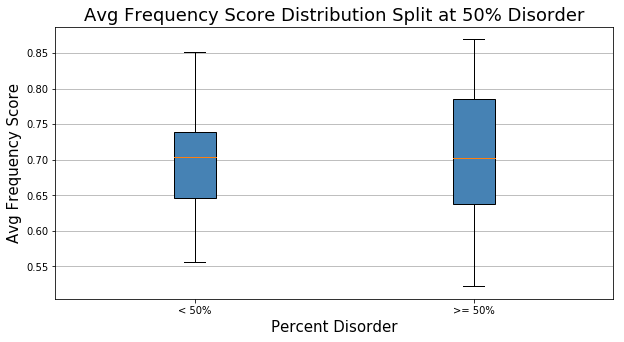

In [39]:
plot_boxplot("Avg Frequency Score");

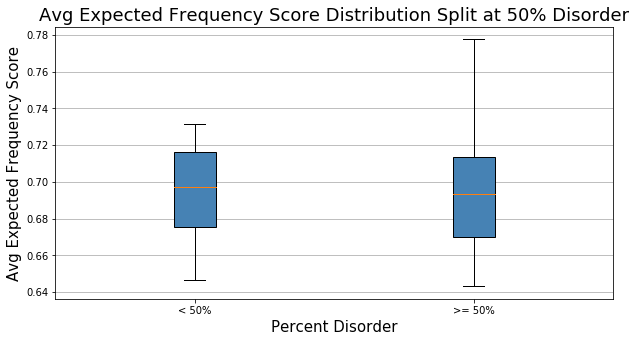

In [40]:
plot_boxplot("Avg Expected Frequency Score");

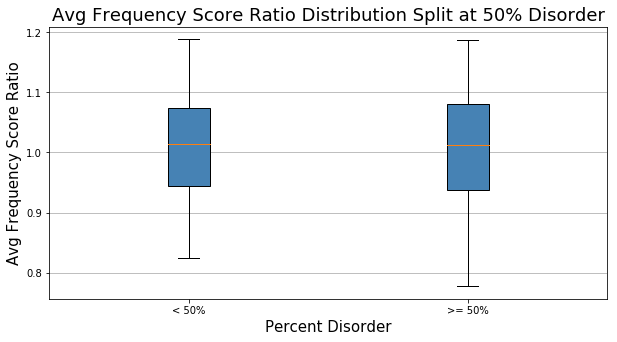

In [41]:
plot_boxplot("Avg Frequency Score Ratio");

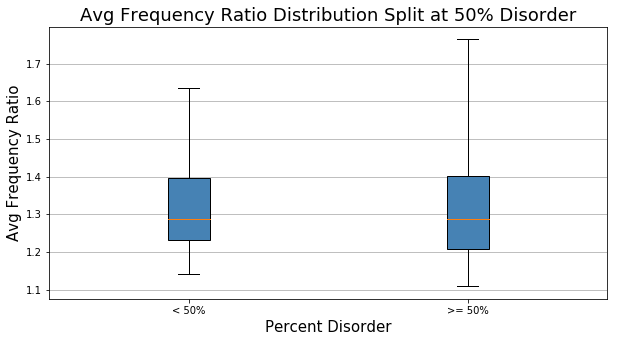

In [42]:
plot_boxplot("Avg Frequency Ratio");

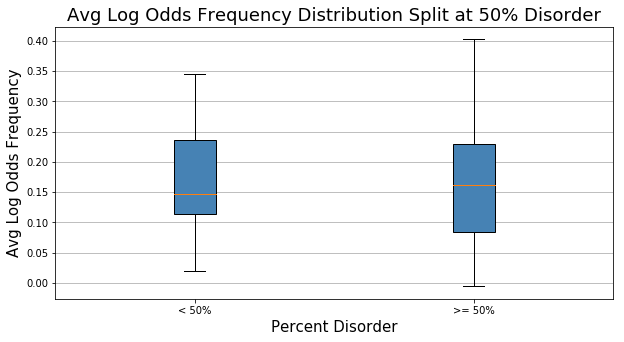

In [43]:
plot_boxplot("Avg Log Odds Frequency");

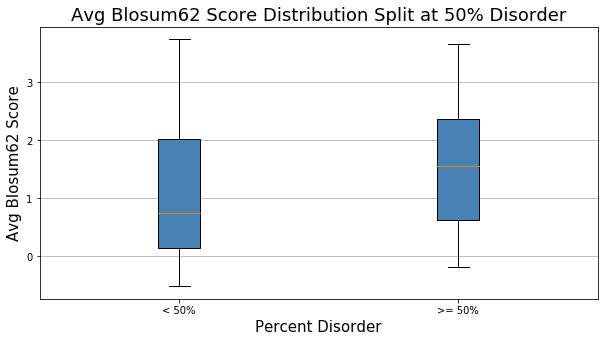

In [44]:
plot_boxplot('Avg Blosum62 Score');

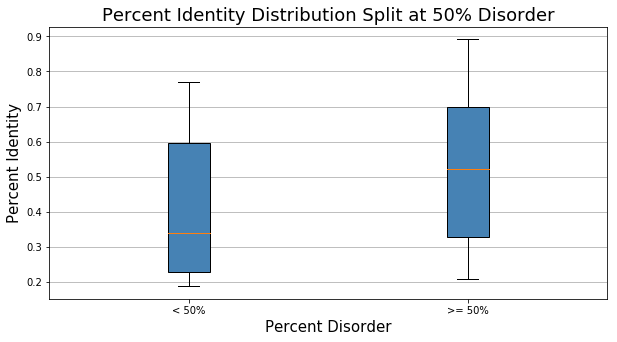

In [45]:
plot_boxplot('Percent Identity');

## Plot Column Scores as a Function of Disorder

To get a general sense of how scores differ based on which disorder score is used

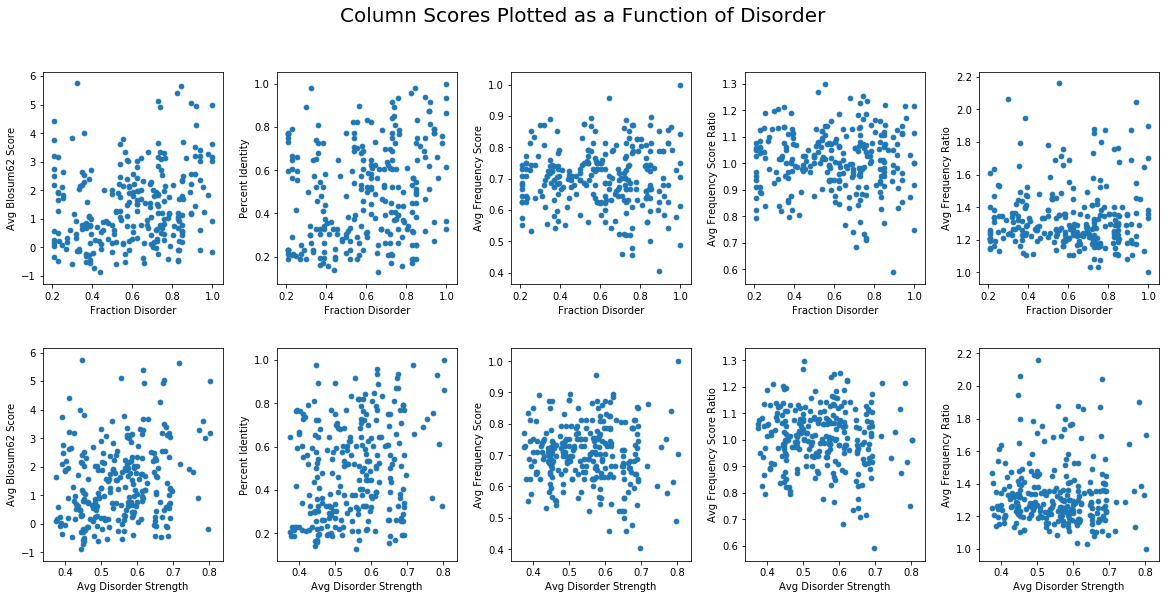

In [46]:
fig, ([ax1,ax2,ax3,ax4,ax5], [ax6,ax7,ax8,ax9,ax10]) = plt.subplots(2, 5, figsize=(20,9), sharex='row', sharey='col')

fig.suptitle("Column Scores Plotted as a Function of Disorder", fontsize=20)

# fraction disordered
ax1.scatter(df_clean['Fraction Disordered'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set(xlabel='Fraction Disorder', ylabel='Avg Blosum62 Score')

ax2.scatter(df_clean['Fraction Disordered'], df_clean['Percent Identity'], s=22)
ax2.set(xlabel='Fraction Disorder', ylabel='Percent Identity')

ax3.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Score'], s=22)
ax3.set(xlabel='Fraction Disorder', ylabel='Avg Frequency Score')

ax4.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Score Ratio'], s=22)
ax4.set(xlabel='Fraction Disorder', ylabel='Avg Frequency Score Ratio')

ax5.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Ratio'], s=22)
ax5.set(xlabel='Fraction Disorder', ylabel='Avg Frequency Ratio')

# avg disorder strength
ax6.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Blosum62 Score'], s=22)
ax6.set(xlabel='Avg Disorder Strength', ylabel='Avg Blosum62 Score')

ax7.scatter(df_clean['Avg Disorder Strength'], df_clean['Percent Identity'], s=22)
ax7.set(xlabel='Avg Disorder Strength', ylabel='Percent Identity')

ax8.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Score'], s=22)
ax8.set(xlabel='Avg Disorder Strength', ylabel='Avg Frequency Score')

ax9.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Score Ratio'], s=22)
ax9.set(xlabel='Avg Disorder Strength', ylabel='Avg Frequency Score Ratio')

ax10.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Ratio'], s=22)
ax10.set(xlabel='Avg Disorder Strength', ylabel='Avg Frequency Ratio')

fig.subplots_adjust(hspace=0.3, wspace=0.3);

Avg Log odds Freq included at bottom of section

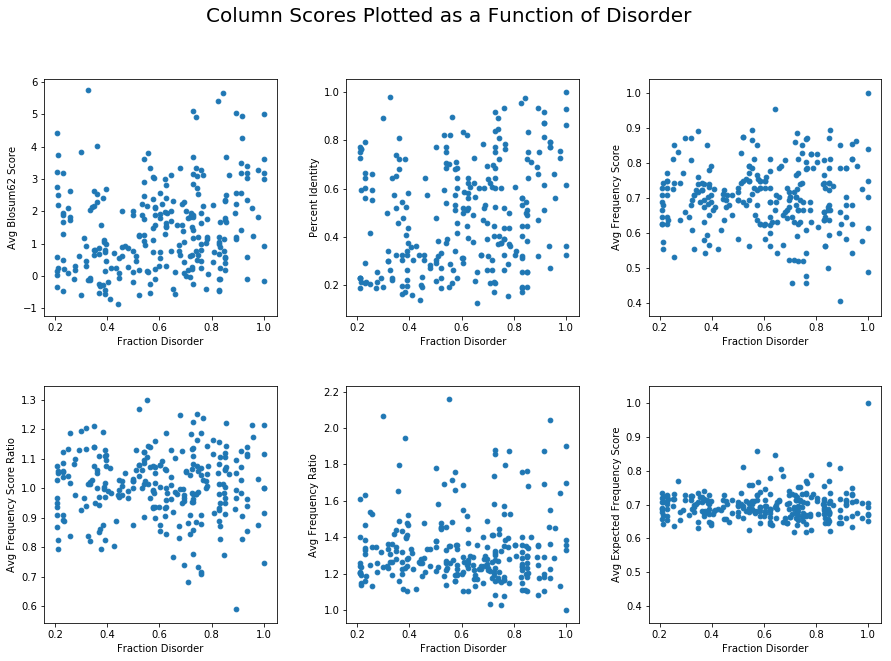

In [47]:
# fraction disordered
fig, ([ax1,ax2,ax3], [ax4,ax5,ax6]) = plt.subplots(2, 3, figsize=(15,10), sharex=True, subplot_kw={'xlabel':"Fraction Disorder"})

fig.suptitle("Column Scores Plotted as a Function of Disorder", fontsize=20)


ax1.scatter(df_clean['Fraction Disordered'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score')

ax2.scatter(df_clean['Fraction Disordered'], df_clean['Percent Identity'], s=22)
ax2.set(ylabel='Percent Identity')

ax3.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Score'], s=22)
ax3.set(ylabel='Avg Frequency Score')

ax4.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Score Ratio'], s=22)
ax4.set(ylabel='Avg Frequency Score Ratio')

ax5.scatter(df_clean['Fraction Disordered'], df_clean['Avg Frequency Ratio'], s=22)
ax5.set(ylabel='Avg Frequency Ratio')

ax6.scatter(df_clean['Fraction Disordered'], df_clean['Avg Expected Frequency Score'], s=22)
ax6.set(ylabel='Avg Expected Frequency Score', ylim=[0.35,1.05])

for ax in fig.axes:
    ax.xaxis.set_tick_params(labelbottom=True)

fig.subplots_adjust(hspace=0.3, wspace=0.3);

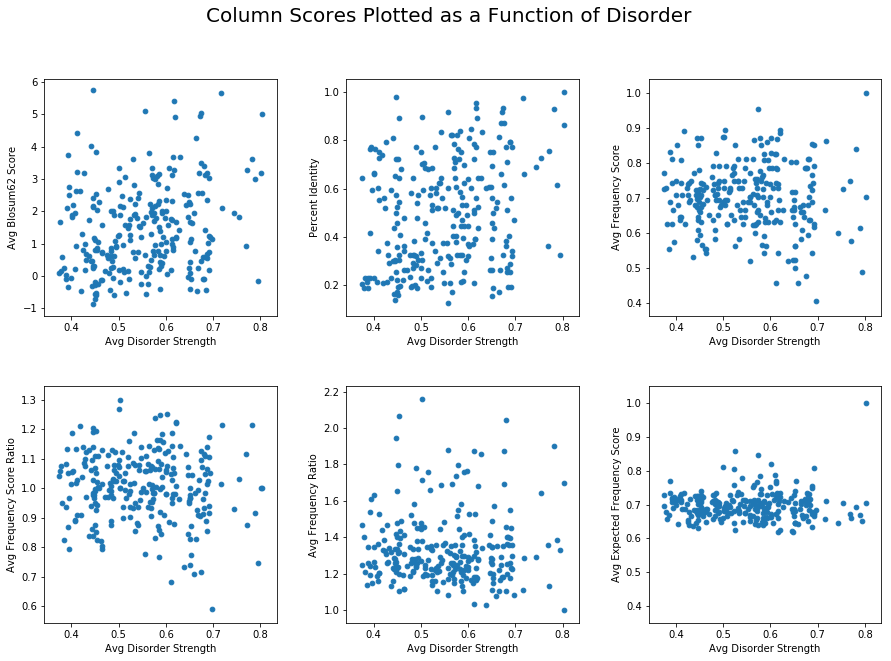

In [48]:
# Avg Disorder Strength
fig, ([ax1,ax2,ax3], [ax4,ax5,ax6]) = plt.subplots(2, 3, figsize=(15,10), sharex=True, subplot_kw={'xlabel':"Avg Disorder Strength"})

fig.suptitle("Column Scores Plotted as a Function of Disorder", fontsize=20)


ax1.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Blosum62 Score'], s=22)
ax1.set(ylabel='Avg Blosum62 Score')

ax2.scatter(df_clean['Avg Disorder Strength'], df_clean['Percent Identity'], s=22)
ax2.set(ylabel='Percent Identity')

ax3.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Score'], s=22)
ax3.set(ylabel='Avg Frequency Score')

ax4.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Score Ratio'], s=22)
ax4.set(ylabel='Avg Frequency Score Ratio')

ax5.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Frequency Ratio'], s=22)
ax5.set(ylabel='Avg Frequency Ratio')

ax6.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Expected Frequency Score'], s=22)
ax6.set(ylabel='Avg Expected Frequency Score', ylim=[0.35,1.05])

for ax in fig.axes:
    ax.xaxis.set_tick_params(labelbottom=True)

fig.subplots_adjust(hspace=0.3, wspace=0.3);

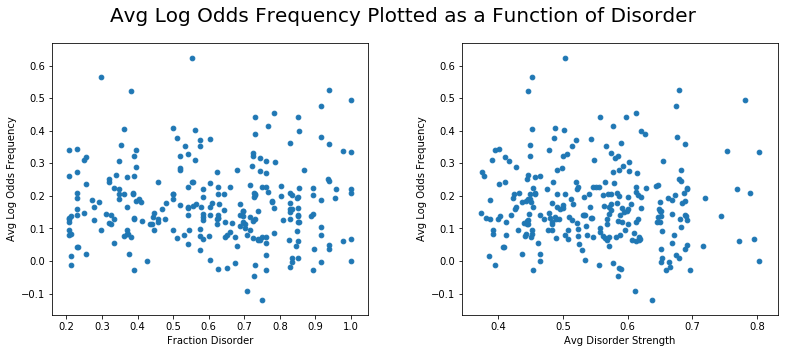

In [49]:
fig, ([ax1,ax2]) = plt.subplots(1, 2, figsize=(13,5), sharey=True, subplot_kw={'ylabel':"Avg Log Odds Frequency"})

fig.suptitle("Avg Log Odds Frequency Plotted as a Function of Disorder", fontsize=20)


ax1.scatter(df_clean['Fraction Disordered'], df_clean['Avg Log Odds Frequency'], s=22)
ax1.set(xlabel="Fraction Disorder")

ax2.scatter(df_clean['Avg Disorder Strength'], df_clean['Avg Log Odds Frequency'], s=22)
ax2.set(xlabel="Avg Disorder Strength")

for ax in fig.axes:
    ax.yaxis.set_tick_params(labelbottom=True)
    
fig.subplots_adjust(hspace=0.3, wspace=0.3);

## Fraction Disorder Filters

In [50]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
len(df_clean_25d)

21

In [51]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
len(df_clean_50d)

65

In [52]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
len(df_clean_75d)

101

In [53]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
len(df_clean_100d)

73

## Disorder Strength Filters

In [54]:
df_clean_25ds = df_clean[df_clean['Avg Disorder Strength'] <= 0.25]
len(df_clean_25ds)

0

In [55]:
df_clean_50ds = df_clean[(df_clean['Avg Disorder Strength'] <= 0.50) & (df_clean['Avg Disorder Strength'] > 0.25)]
len(df_clean_50ds)

89

In [56]:
df_clean_75ds = df_clean[(df_clean['Avg Disorder Strength'] <= 0.75) & (df_clean['Avg Disorder Strength'] > 0.50)]
len(df_clean_75ds)

163

In [57]:
df_clean_100ds = df_clean[(df_clean['Avg Disorder Strength'] <= 1.0) & (df_clean['Avg Disorder Strength'] > 0.75)]
len(df_clean_100ds)

8

Clear difference in distribution of columns when split into quarters

## Boxplots for 25% disorder split 

In [58]:
def plot_boxplots(column_name):
    '''
    Expects the above dataframes to be defined.
    Plots 2 boxplots with 4 boxes split by 25% Disorder
    '''
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10), sharey=True)
    fig.suptitle("Distribtuion of " + column_name + " Split at Every 25% Disorder", fontsize=27)
    color = "steelblue"

    data1 = ax1.boxplot([df_clean_25d[column_name], df_clean_50d[column_name], df_clean_75d[column_name], df_clean_100d[column_name]],
                whis=[5, 95], showfliers=False, patch_artist=True, boxprops=dict(facecolor=color, color="black"))


    data2 = ax2.boxplot([df_clean_25ds[column_name], df_clean_50ds[column_name], df_clean_75ds[column_name],df_clean_100ds[column_name]], 
                whis=[5, 95], showfliers=False, patch_artist=True, boxprops=dict(facecolor=color, color="black"))
    
    # test median
    #print(data1['medians'])
    
    titles = ["Fraction Disorder", "Avg Disorder Strength"]
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelsize=15)
        ax.set_xlabel("Percent Disorder", fontsize=20)
        ax.set_ylabel(column_name, fontsize=20)
        ax.set_title(titles[i], fontsize=22.5)
        ax.set_xticklabels(["0-25%","25-50%", "50-75%", "75-100%"])   # wouldn't work in subplot_kw
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)
        ax.grid(True, axis='y');


[<matplotlib.lines.Line2D object at 0x10D175F0>, <matplotlib.lines.Line2D object at 0x10D0A0F0>, <matplotlib.lines.Line2D object at 0x10D137B0>, <matplotlib.lines.Line2D object at 0x10D3B570>]


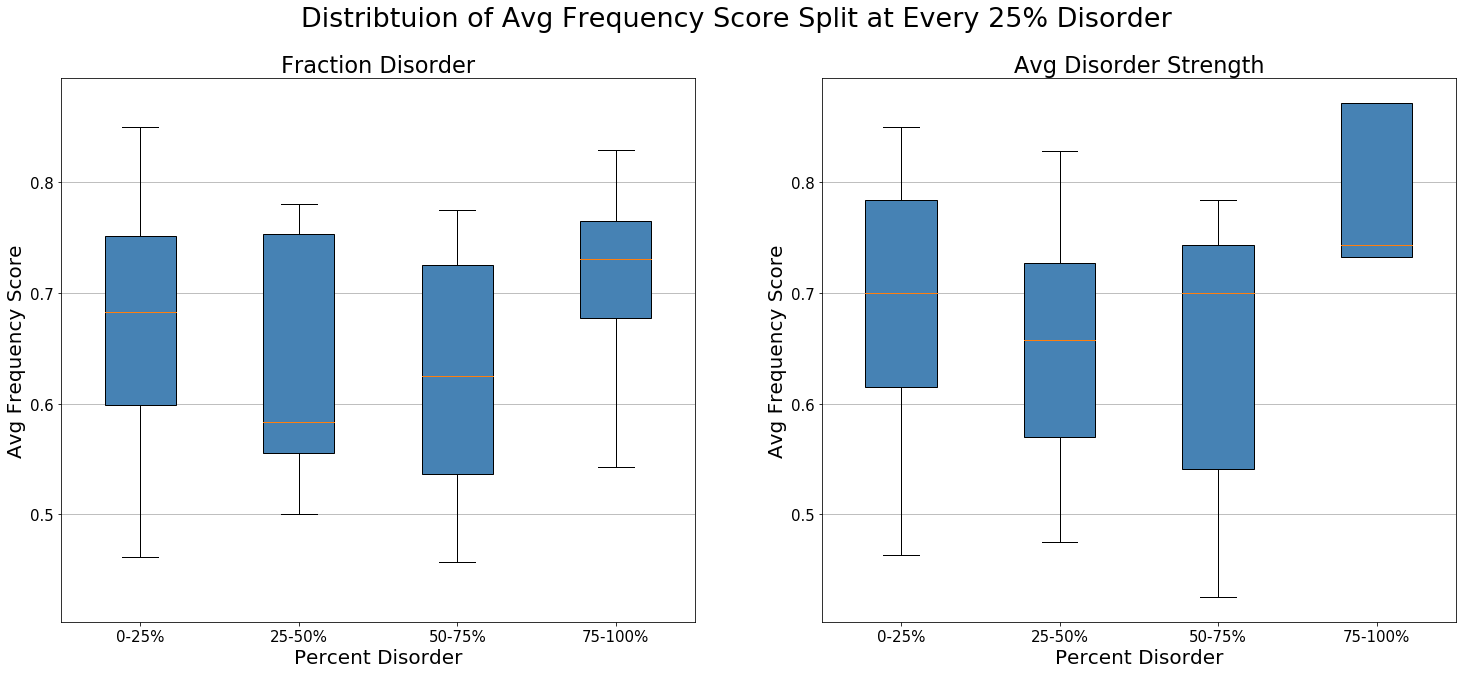

In [77]:
# test medians
plot_boxplots("Avg Frequency Score")

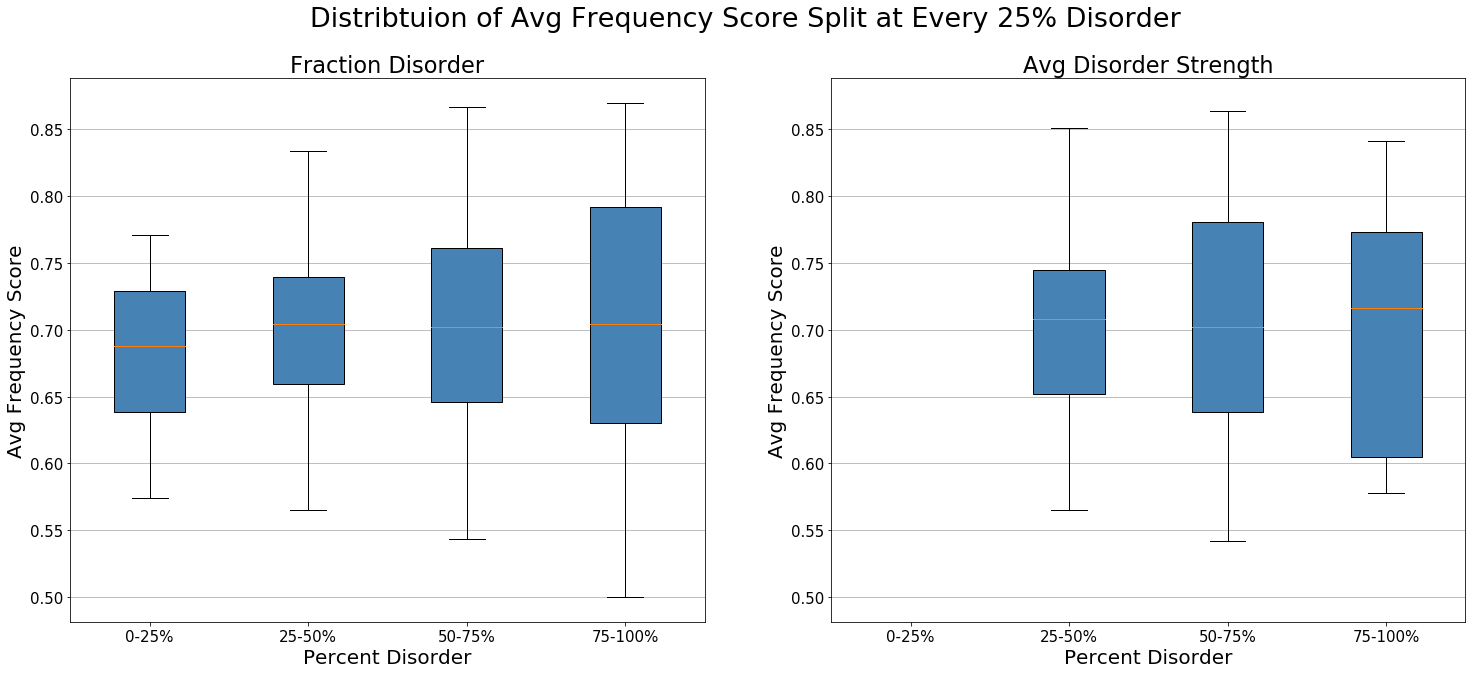

In [59]:
plot_boxplots("Avg Frequency Score")

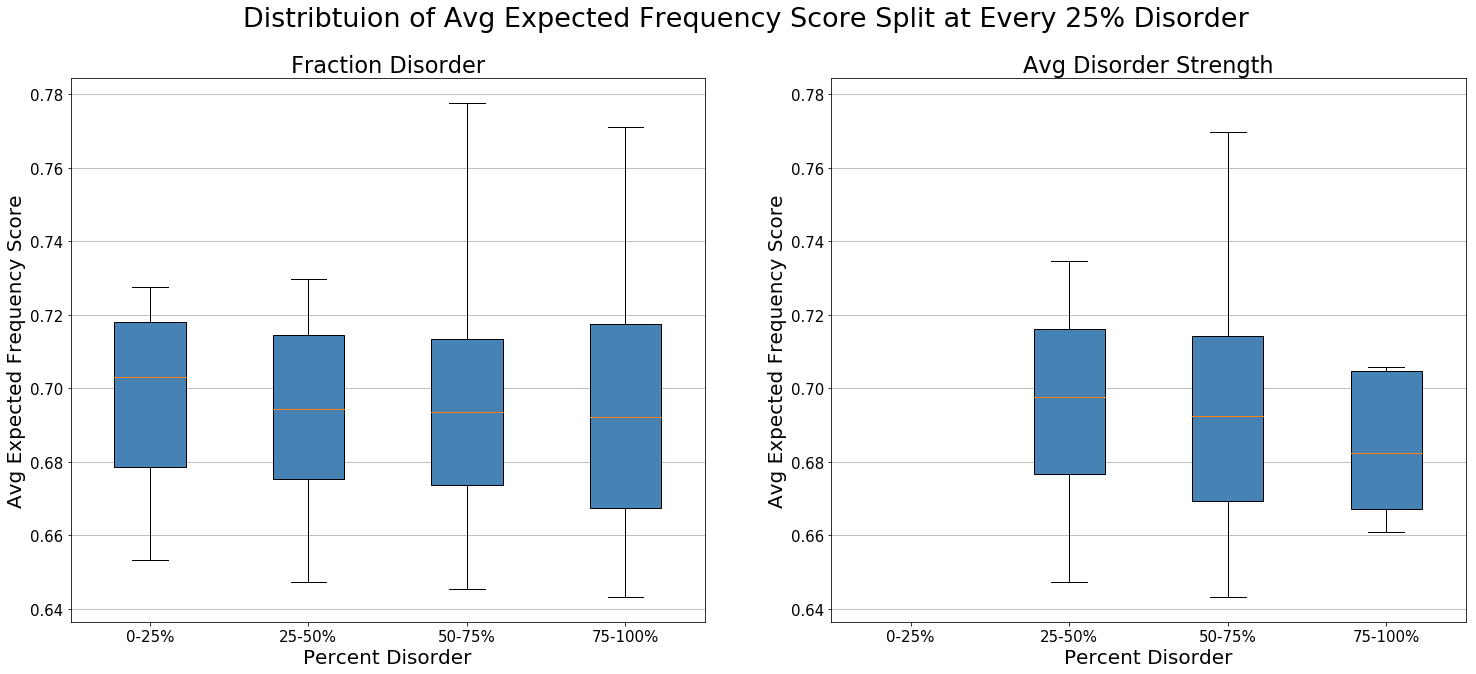

In [60]:
plot_boxplots("Avg Expected Frequency Score")

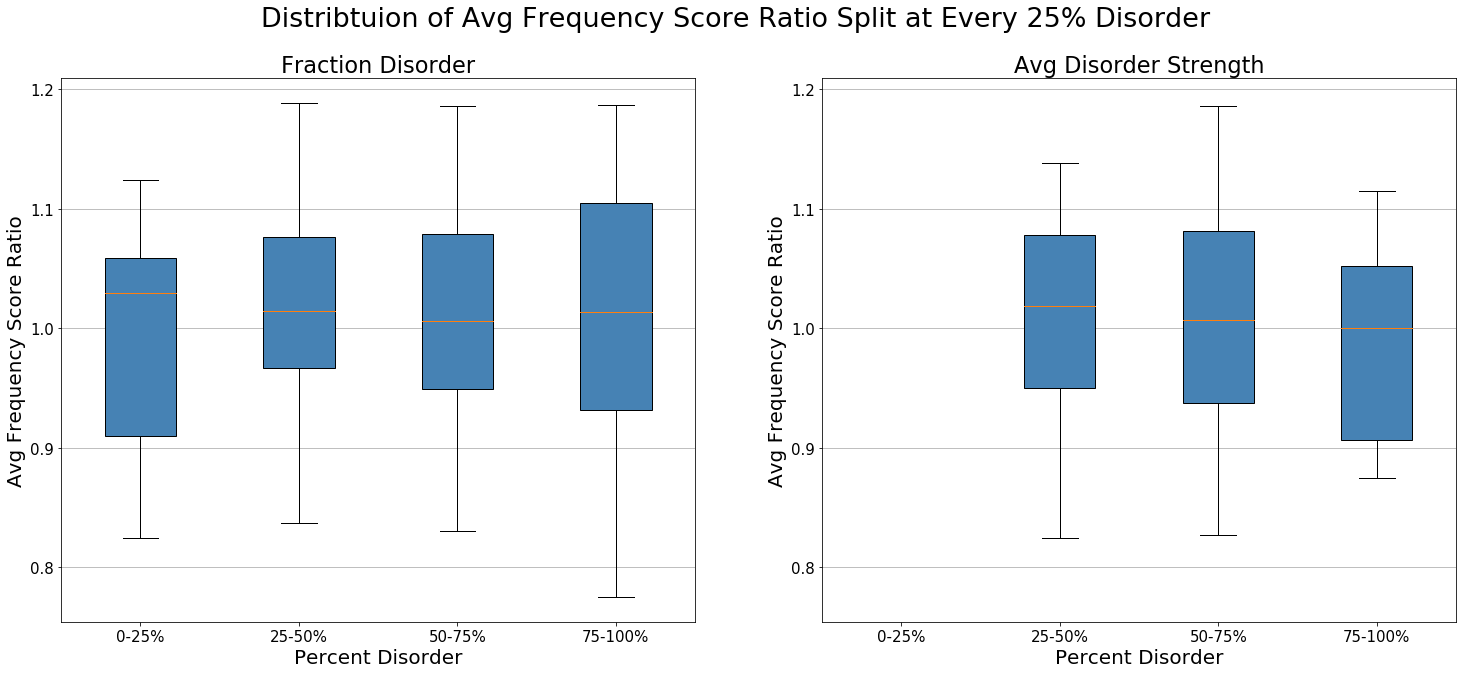

In [61]:
plot_boxplots("Avg Frequency Score Ratio")

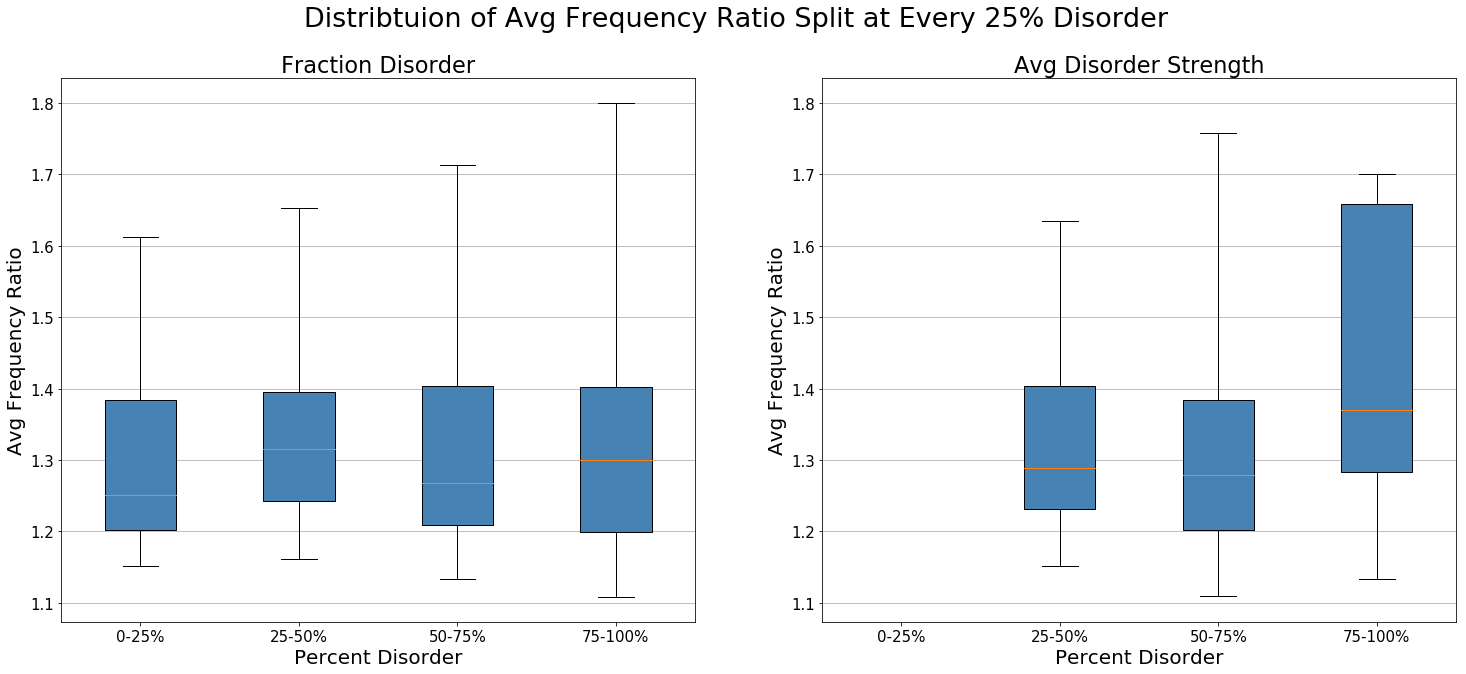

In [62]:
plot_boxplots("Avg Frequency Ratio")

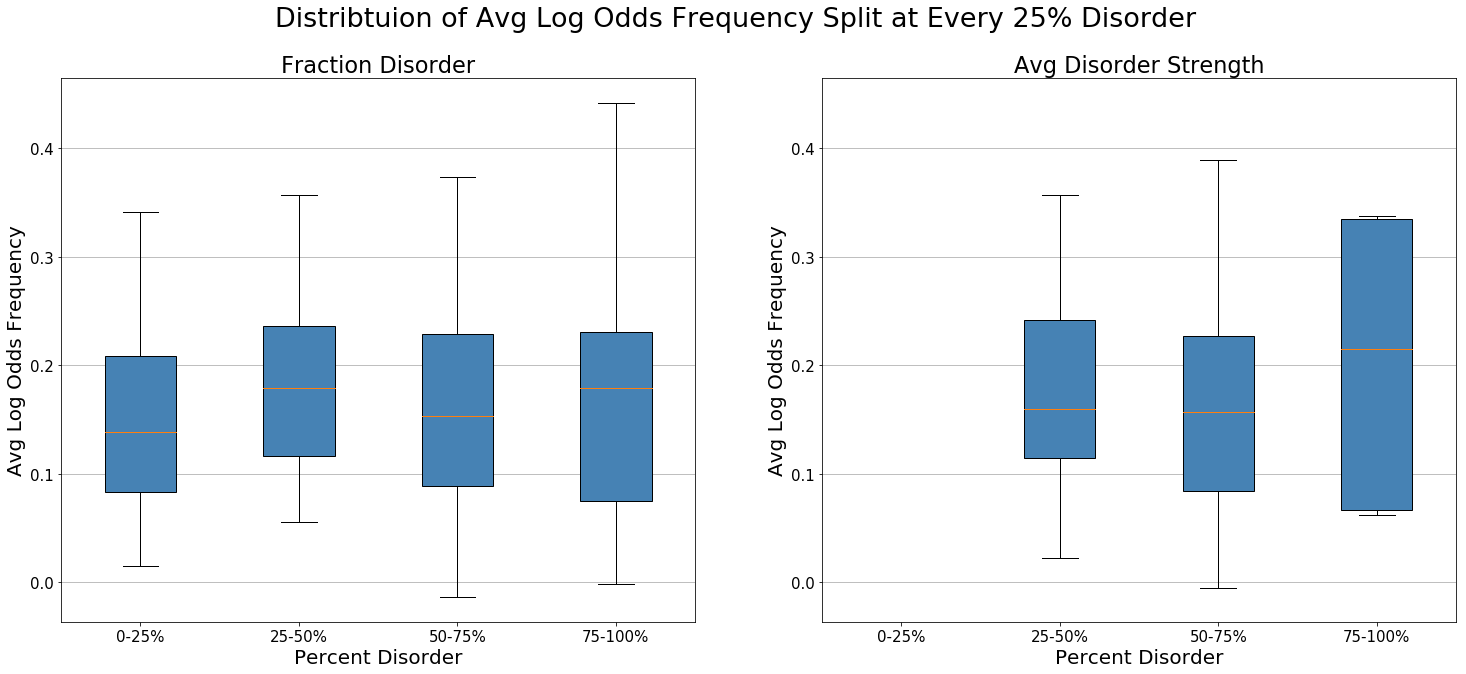

In [63]:
plot_boxplots("Avg Log Odds Frequency")

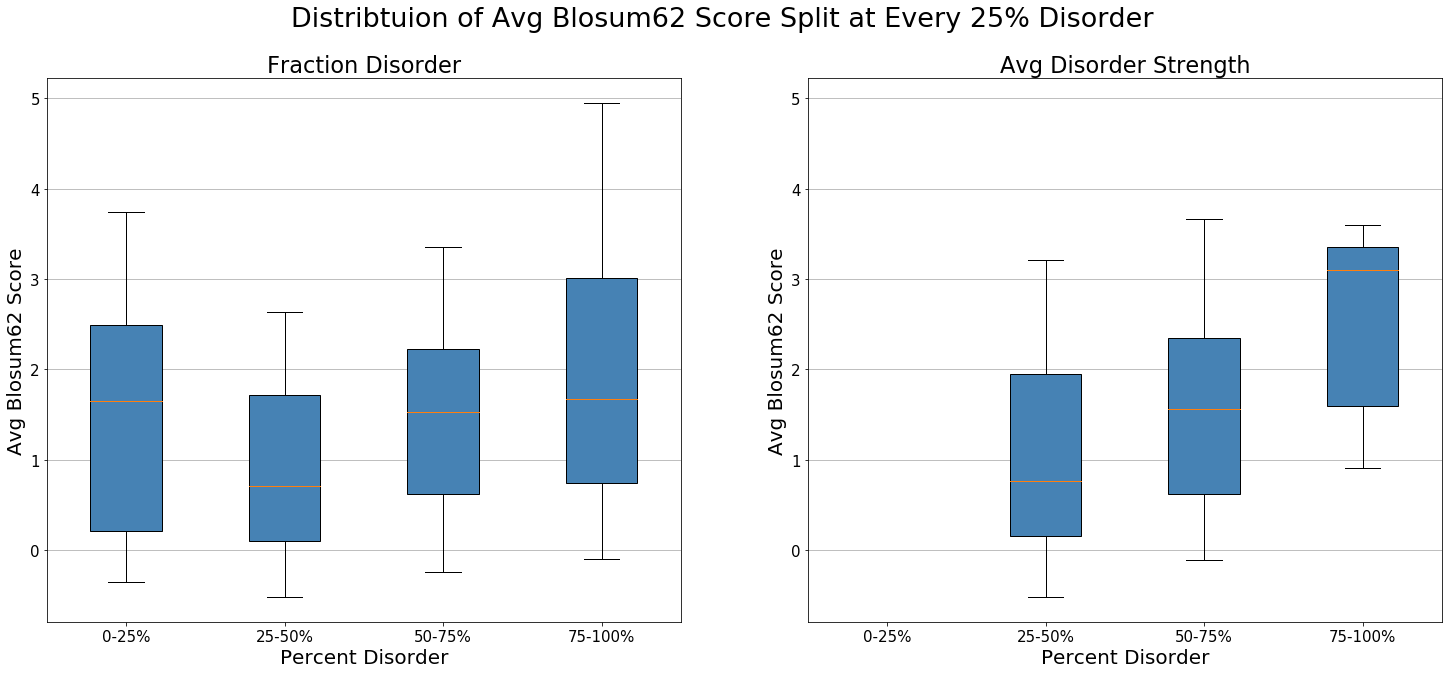

In [64]:
plot_boxplots("Avg Blosum62 Score")

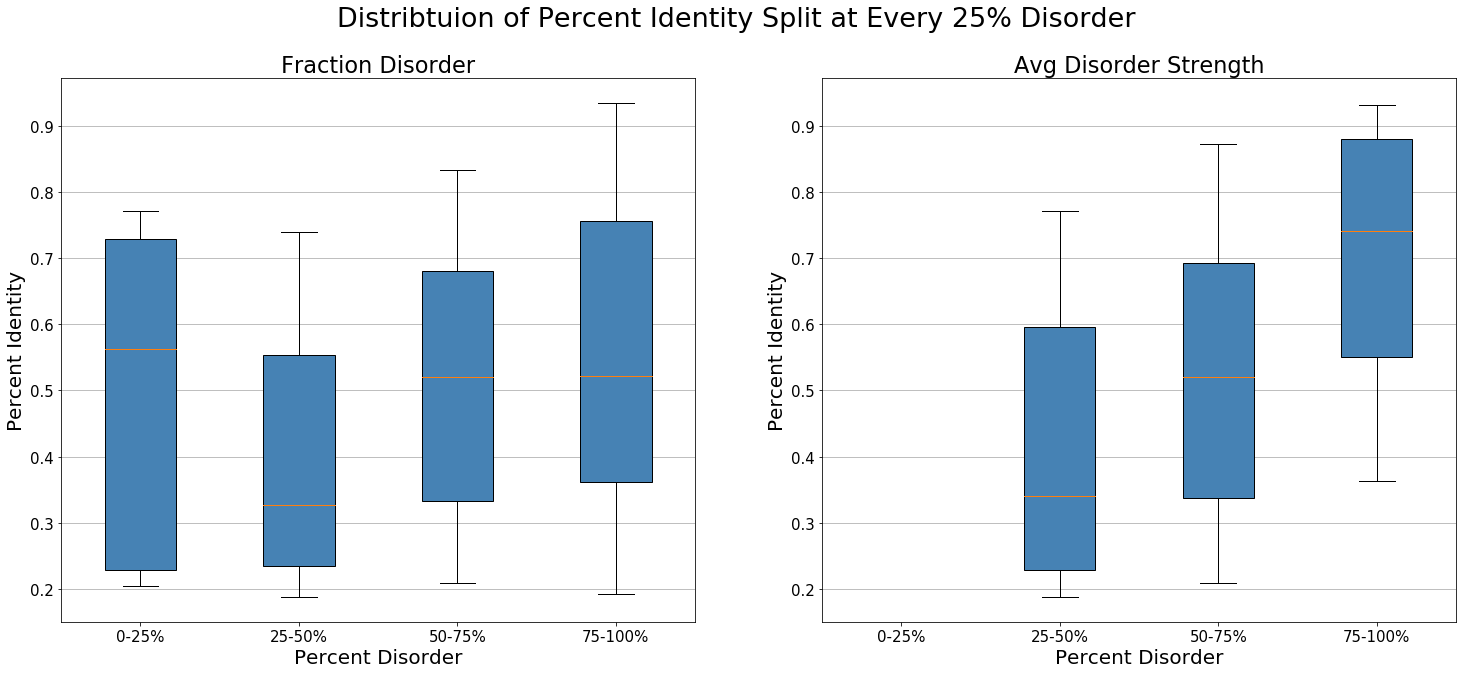

In [66]:
plot_boxplots("Percent Identity")